In [7]:
import warnings
import os
from os import listdir
from os.path import basename, splitext
from itertools import permutations
from multiprocessing import Pool

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, Timedelta,  read_hdf
# import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm 

In [8]:
# Settings
warnings.filterwarnings("ignore")
# plt.rcParams['figure.autolayout'] = True # Неверно сохраняет изображения
plt.rcParams['figure.figsize'] = (20, 8)

%matplotlib inline

**Get all HDF files, which were generated by the converter**

In [9]:
def get_hdf_files():
    return listdir('data/hdf/')

In [10]:
hdf_files = get_hdf_files()
hdf_files.remove('btcusdt.hdf')
hdf_files

['xrpbtc.hdf',
 'qtumbnb.hdf',
 'omgbtc.hdf',
 'xrpeth.hdf',
 'zeceth.hdf',
 'zrxbtc.hdf',
 'qtumeth.hdf',
 'etcbtc.hdf',
 'xrpbnb.hdf',
 'qtumbtc.hdf',
 'neousdt.hdf',
 'xlmeth.hdf',
 'etcbnb.hdf',
 'zecbtc.hdf',
 'etceth.hdf',
 'omgeth.hdf',
 'xrpusdt.hdf',
 'ethusdt.hdf',
 'qtumusdt.hdf',
 'neobnb.hdf',
 'xlmusdt.hdf',
 'bnbusdt.hdf',
 'dasheth.hdf',
 'ltceth.hdf',
 'bnbbtc.hdf',
 'adausdt.hdf',
 'bnbeth.hdf',
 'neobtc.hdf',
 'ethbtc.hdf',
 'adabnb.hdf',
 'xmrbtc.hdf',
 'neoeth.hdf',
 'adaeth.hdf',
 'xmreth.hdf',
 'ltcusdt.hdf',
 'xlmbnb.hdf',
 'adabtc.hdf',
 'ltcbnb.hdf',
 'etcusdt.hdf',
 'zrxeth.hdf',
 'xlmbtc.hdf',
 'ltcbtc.hdf',
 'dashbtc.hdf']

**Extract data from HDF**

In [11]:
def downsample(df):
    return df.resample('60Min').last()

In [12]:
def to_dataframe(hdf):
    return DataFrame(read_hdf(f"data/hdf/{hdf}"))

In [13]:
def separate(ticker):
    for quoted in ['usdt', 'btc', 'eth', 'bnb']:
        if ticker.find(quoted) in [-1, 0]:
            continue
        return ticker.replace(quoted, f" / {quoted}").upper()

In [14]:
def tickername(file):
    ticker = splitext(basename(file))[0]
    return separate(ticker)

In [15]:
def load(hdf):
    ticker = tickername(hdf)
    df = to_dataframe(hdf)
    df.columns = [ticker]
    return downsample(df)

In [16]:
ticker_dfs = Pool().map(load, hdf_files)

In [17]:
btcusdt = load('btcusdt.hdf')
btcusdt.head()

,BTC/USDT
Date_Time,
2017-08-17 07:00:00,4308.83
2017-08-17 08:00:00,4315.32
2017-08-17 09:00:00,4324.35
2017-08-17 10:00:00,4349.99
2017-08-17 11:00:00,4360.69


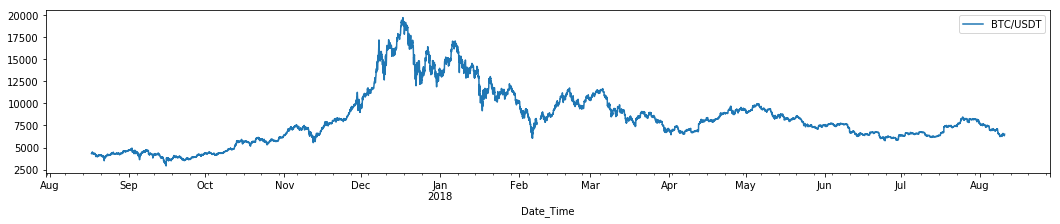

In [18]:
btcusdt.plot(figsize=(18, 3))

**Сreation of dataframe with all tickers**

In [21]:
def not_quoted_by(currency, df):
    return list(filter(lambda t: f" / {currency}" not in t, df.columns))

In [19]:
full_df = btcusdt.join(ticker_dfs)
# After dropna period decreases. It may be worth replacing NaN values.
full_df.dropna(inplace=True) 
# full_df = all_df.loc["2018-06-28 05:00:00": "2018-06-29 23:00:00"]

# cut off the BNB
full_df = full_df[not_quoted_by('BNB', full_df)]

full_df.head(3)

,BTC/USDT,XRP/BTC,QTUM/BNB,OMG/BTC,XRP/ETH,ZEC/ETH,ZRX/BTC,QTUM/ETH,ETC/BTC,XRP/BNB,...,XMR/ETH,LTC/USDT,XLM/BNB,ADA/BTC,LTC/BNB,ETC/USDT,ZRX/ETH,XLM/BTC,LTC/BTC,DASH/BTC
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,6851.94,0.000086,0.77842,0.001427,0.001110,0.38827,0.000150,0.022680,0.002262,0.03823,...,0.25562,106.56,0.01615,0.000026,6.91,15.5300,0.001937,0.000036,0.015566,0.038798
2018-06-12 06:00:00,6811.00,0.000086,0.77324,0.001413,0.001110,0.38968,0.000149,0.022889,0.002242,0.03720,...,0.25553,105.00,0.01588,0.000026,6.75,15.2300,0.001940,0.000036,0.015446,0.039055
2018-06-12 07:00:00,6812.20,0.000086,0.76153,0.001405,0.001104,0.38883,0.000150,0.022943,0.002296,0.03678,...,0.25376,106.35,0.01564,0.000026,6.69,15.6002,0.001932,0.000036,0.015618,0.038967


In [20]:
full_df.index

DatetimeIndex(['2018-06-12 05:00:00', '2018-06-12 06:00:00',
               '2018-06-12 07:00:00', '2018-06-12 08:00:00',
               '2018-06-12 09:00:00', '2018-06-12 10:00:00',
               '2018-06-12 11:00:00', '2018-06-12 12:00:00',
               '2018-06-12 13:00:00', '2018-06-12 14:00:00',
               ...
               '2018-08-10 06:00:00', '2018-08-10 07:00:00',
               '2018-08-10 08:00:00', '2018-08-10 09:00:00',
               '2018-08-10 10:00:00', '2018-08-10 11:00:00',
               '2018-08-10 12:00:00', '2018-08-10 13:00:00',
               '2018-08-10 14:00:00', '2018-08-10 15:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=1409, freq=None)

**Convert missing to USDT**

In [22]:
def quoted_by(currency, df):
    return list(filter(lambda t: f" / {currency}" in t, df.columns))

In [23]:
not_usdt_df = full_df[not_quoted_by('USDT', full_df)]
not_usdt_df = not_usdt_df[quoted_by('BTC', full_df)]
not_usdt_df.columns

Index(['XRP/BTC', 'OMG/BTC', 'ZRX/BTC', 'ETC/BTC', 'QTUM/BTC', 'ZEC/BTC',
       'BNB/BTC', 'NEO/BTC', 'ETH/BTC', 'XMR/BTC', 'ADA/BTC', 'XLM/BTC',
       'LTC/BTC', 'DASH/BTC'],
      dtype='object')

In [24]:
converted_usdt_df = DataFrame()

for ticker in not_usdt_df.columns:
    base, quoted = ticker.split(' / ')
    new_ticker = f"{base} / USDT"
    if new_ticker not in full_df:
        converted_usdt_df[new_ticker] = not_usdt_df[ticker] * full_df[f"BTC / USDT"]
    
converted_usdt_df.head(3)

,OMG/USDT,ZRX/USDT,ZEC/USDT,XMR/USDT,DASH/USDT
Date_Time,,,,,
2018-06-12 05:00:00,9.777718,1.028476,206.496916,135.264148,265.841568
2018-06-12 06:00:00,9.623943,1.017223,205.133698,134.462762,266.003605
2018-06-12 07:00:00,9.571141,1.025236,205.714816,133.995974,265.450997


In [25]:
full_df = full_df.join(converted_usdt_df)

**Normalization**

In [26]:
def normalize(df):
    for ticker in df.columns:
        df[ticker] = StandardScaler().fit_transform(
            df[ticker].values.reshape(-1, 1))
    return df

In [27]:
full_df = normalize(full_df)

**Split by quoted currency**

In [28]:
def split_by_quoted(df):
    return {
        'all': df,
        'usdt': df[quoted_by('USDT', df)],
        'btc': df[quoted_by('BTC', df)],
        'eth': df[quoted_by('ETH', df)],
    }

In [29]:
dfs_by_quoted = split_by_quoted(full_df)

**Sort by ticker**

In [30]:
def weigh_quoted(quoted):
    pos = ['USDT', 'BTC', 'ETH'].index(quoted) + 1 
    return pos * 1000

In [31]:
def weigh_base(base):
    # TODO: Sort by coinmarcetcup top
    bases = [
       'BTC', 'XRP', 'ETH', 'XLM', 'LTC', 'USDT', 'ADA',
       'XMR', 'DASH', 'BNB', 'NEO', 'ETC', 'ZEC', 'MKR',
       'DOGE', 'ZRX', 'OMG', 'DCR', 'QTUM']
    try:
        weigh = bases.index(base)
    except ValueError:
        weigh = 999
    return weigh

In [32]:
def weigh_ticker(ticker):
    base, quoted = ticker.split('/')
    return weigh_quoted(quoted) + weigh_base(base)

In [33]:
def sorted_by_ticker(df):
    tickers = list(df.columns)
    sorted_tickers = sorted(tickers, key=weigh_ticker)
    return df[sorted_tickers]

In [34]:
dfs_by_quoted = {ticker: sorted_by_ticker(df) for ticker, df in dfs_by_quoted.items()}

**All time correlation plot**

In [65]:
def btcusdt_plotter(ax, btcusdt, title='', param_dict=None):
    if param_dict is None:
        param_dict = {}
    ax.set_title(title)
    out = ax.plot(btcusdt, label='BTC / USDT', **param_dict)
    plt.legend()
    return out

In [66]:
def corr_matrix_plotter(ax, corr, title='', colormap='RdYlGn'):    
    if title:
        ticks = range(len(corr.columns))
        labels = list(corr.columns)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_xticklabels(labels, rotation='vertical')
        ax.set_yticklabels(labels)
        ax.set_title(title)
        
    cmap = cm.get_cmap(colormap, 256)
    im = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    return im

In [67]:
def calc_mean(corr):
    return round((corr.mean().mean()), 4)

In [92]:
def period_plotter(corr_by_quoted, corr_period, window_size=None, filename=None):  
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    gs = fig.add_gridspec(3, 4)
    gcfgs = (('usdt', gs[0, 2]), ('btc', gs[0, 3]), ('eth', gs[1, 2:]))
    
    full_corr = corr_by_quoted['all']
    ax_full = fig.add_subplot(gs[:-1, :2])
    im = corr_matrix_plotter(
        ax_full, full_corr, 
        title=f"All\nMean abs = {abs(calc_mean(full_corr))}")
    
    # colorbar
    fig.colorbar(im, ax=ax_full, ticks=[1, 0, -1])
    
    #btc/usdt period
    start, end = corr_period
    window_size = f"Rolling window [{window_size}]" if window_size else ''
    btcusdt_title = f"Period {start} to {end}. {window_size}"
    ax_period = fig.add_subplot(gs[-1, :])
    btcusdt_plotter(ax_period, btcusdt.loc[start: end], btcusdt_title)
    
    # splited by quoted currency
    for ticker, gcfg in gcfgs:
        ax = fig.add_subplot(gcfg)
        corr = corr_by_quoted[ticker]
        corr_matrix_plotter(
            ax, corr,
            title=f"{ticker.upper()}\nMean abs = {abs(calc_mean(corr))}")
    
    if filename:
        fig.savefig(f"data/{filename}")

In [93]:
def to_corr(dfs_by_quoted):
    corr_by_quoted = {ticker: df.corr() for ticker, df in dfs_by_quoted.items()}
    return corr_by_quoted

In [94]:
def period(df):
    return df.index[0], df.index[-1]

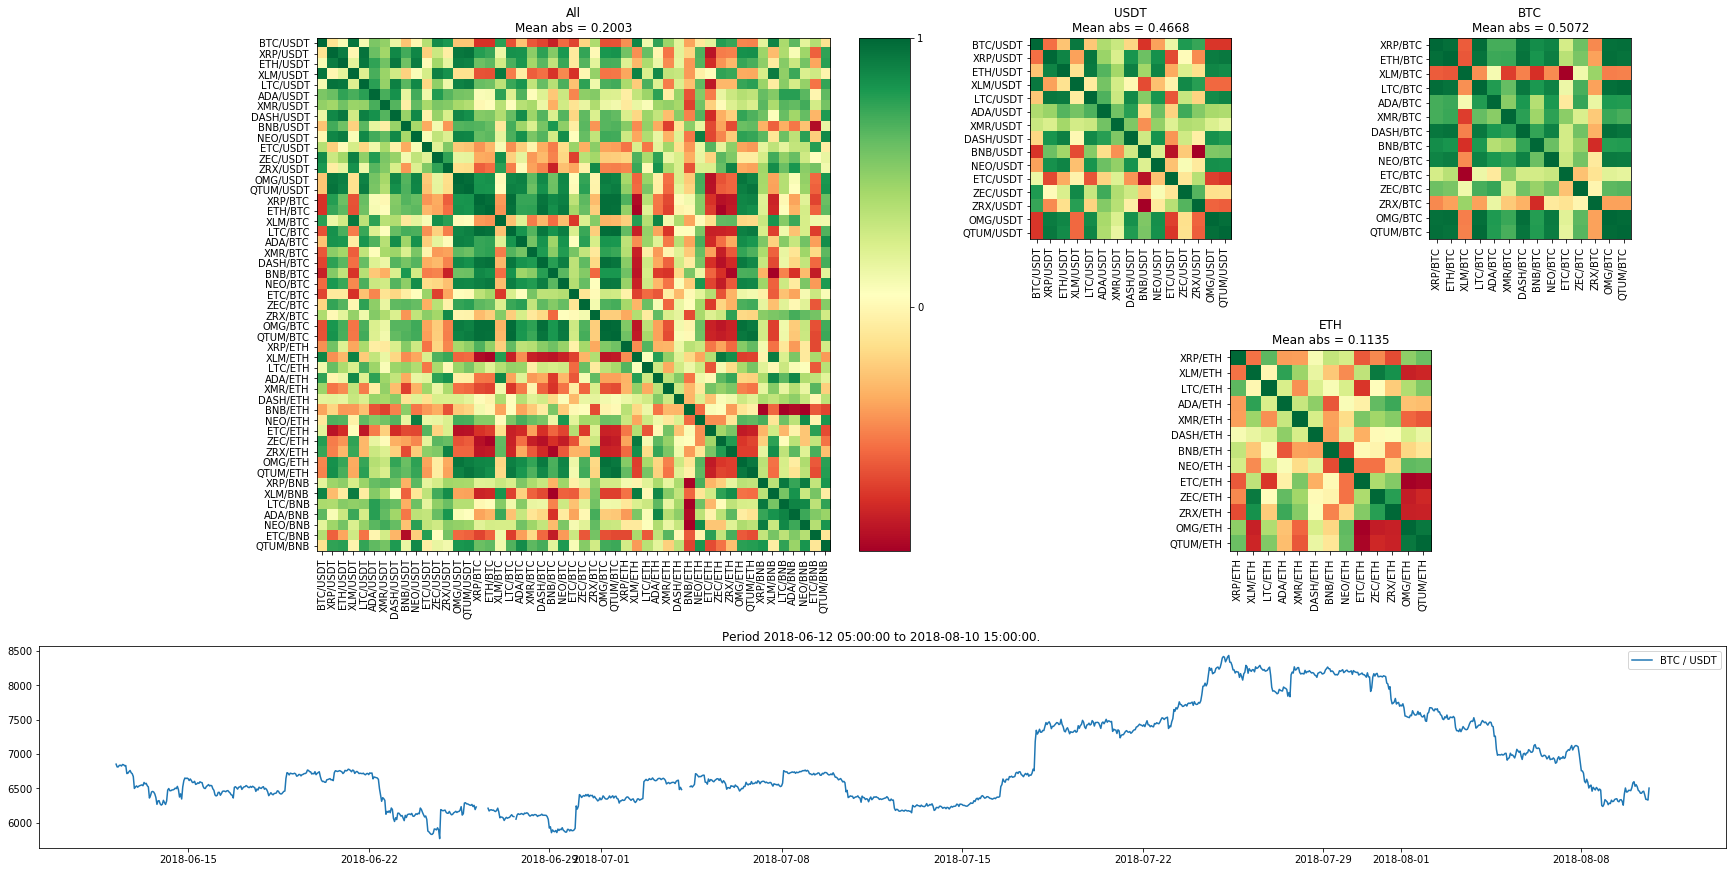

In [95]:
period_plotter(
    to_corr(dfs_by_quoted), corr_period=period(dfs_by_quoted['all']), 
    filename='day_plots/All-Time.png')

**Creating rolling windows**

In [53]:
def create_rolling_windows(window_step, dfs_by_quoted):
    windows_by_size = []
    
    start, end = period(full_df)
    counter = start + window_step
    
    while counter <= end:
        timedelta = counter - start
        window_size = f"{timedelta.days}D"
        windows_by_quoted = {ticker: df.rolling(window_size) for ticker, df in dfs_by_quoted.items()} 
        windows_by_size.append((window_size, windows_by_quoted))
        counter += window_step

    return windows_by_size

In [54]:
windows_by_size = create_rolling_windows(Timedelta('7 days'), dfs_by_quoted)

In [55]:
len(windows_by_size)

8

**Plotting rolling windows**

In [56]:
def days(df):
    datetimes = df.index.levels[0]
    days = set(map(lambda x: x.date(), datetimes))
    return days  

In [57]:
def day_plotter(window_size, corrs_by_quoted):
    corr_all = corrs_by_quoted['all']
    for day in days(corr_all):
        filename = f"{window_size}/{day}"
        corr_period = period(btcusdt.loc[str(day)])
        daily_corr_by_quoted = {
            ticker: df.loc[f"{day} 12:00:00"] 
            for ticker, df in corrs_by_quoted.items()}
        period_plotter(daily_corr_by_quoted, corr_period, window_size, filename)

In [58]:
def make_window_dir(window_size, directory):
    if not os.path.exists(f"data/{directory}/{window_size}"):
        os.makedirs(f"data/{directory}/{window_size}")

In [100]:
corrs_by_size = [(window_size, to_corr(windows_by_quoted)) 
                 for window_size, windows_by_quoted in windows_by_size]

In [ ]:
raise ##############################
for window_size, corrs_by_quoted in corrs_by_size:
    make_window_dir(window_size, directory='day_plots')
    day_plotter(window_size, corrs_by_quoted)

**Plotting Correlation Mean**

In [104]:
raise

RuntimeError: No active exception to reraise

In [103]:
# 7D windows size
window_size, corrs_by_quoted = corrs_by_size[0]

In [ ]:
def corr_mean_plotter(corr_by_quoted, window_size):
    pass

In [ ]:
corr_mean_plotter(corr_7D, size_7D)

In [ ]:
for window_size, corr_by_quoted in corr_by_size:
    make_window_dir(window_size, directory='mean_plots')    
    corr_mean_plotter(corr_by_quoted, window_size)